<a href="https://colab.research.google.com/github/akatukam/Regression-On-Grades/blob/main/RegressionOnGrades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be analyzing survey data gathered from the last exam. The data is here: https://drive.google.com/file/d/1-0d9sGptmBTbzf4jRGYDE8pWwxz0d-0z/view?usp=sharing

In [ ]:
import pandas as pd
import sklearn
from google.colab import drive
drive.mount('/content/drive')

survey = pd.read_csv('/content/drive/My Drive/MidtermSurvey_Processed.csv')
survey = survey.iloc[:, 1:]
survey = survey.dropna(how='all')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create a column that measures, in minutes, how long each student took for their exam. Print the column at the end.

In [ ]:
import numpy as np

survey_time = survey.dropna(subset=['Time'])
fixed_time = pd.to_datetime('3:30 PM')
survey_time['Time'] = pd.to_datetime(survey_time['Time'], errors='coerce')
survey_time = survey_time[survey_time['Time'] >= fixed_time]
survey_time['Duration'] = (survey_time['Time'] - fixed_time).dt.total_seconds() / 60
survey_time['Duration'] = np.ceil(survey_time['Duration'])
print(survey_time['Duration'])

0      75.0
1      76.0
2      70.0
3      75.0
4      76.0
       ... 
233    79.0
234    75.0
235    75.0
236    55.0
237    60.0
Name: Duration, Length: 234, dtype: float64


<ipython-input-107-cfc2ecde24c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_time['Time'] = pd.to_datetime(survey_time['Time'], errors='coerce')


Create a graph, comparing the distributions of the grades of students who thought the exam was fair, kind of fair, or not fair.

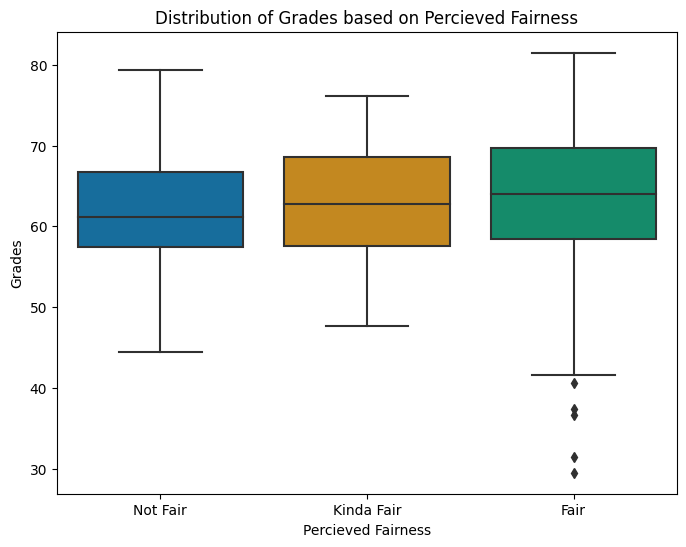

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

yes = survey[survey['Fair'] == 'Yes']['Grade']
kinda = survey[survey['Fair'] == 'Kinda']['Grade']
no = survey[survey['Fair'] == 'No']['Grade']
cols = pd.DataFrame({'Not Fair': no, 'Kinda Fair': kinda, 'Fair': yes})

plt.figure(figsize=(8, 6))
sns.boxplot(data=cols, palette='colorblind')
plt.title('Distribution of Grades based on Percieved Fairness')
plt.xlabel('Percieved Fairness')
plt.ylabel('Grades')
plt.show()

Do a hypothesis test to see if the distributions of student's grades for those of whom thought the exam was fair, kinda fair, or unfair have a stastically significant difference in mean. Print your p-value.

In [ ]:
from scipy.stats import f_oneway

# ANOVA test
f_statistic, p_value = f_oneway(no, kinda, yes)
print(f"P-value: {p_value}")

P-value: 0.8389966340907092


Does studying more improve your score? Find out, and summarize the results below in text format. If it does not, speculate as to why.

In [ ]:
correlation = survey['Hours_Studied'].corr(survey['Grade'])
print(f"Correlation between hours studied and grades: {correlation}")

Correlation between hours studied and grades: 0.06286069182995391


The correlation is positive but extremely low. This tells us that there is an extremely weak correlation between hours studied and how well a student does on the exam. This can be since the exam was really conceptual and based on applying knowledge learnt in class, student's grades were more affected by their general wit and ability to apply logic and not how long they spent studying the material from class.

Make another graph based on a question you think might be interesting.

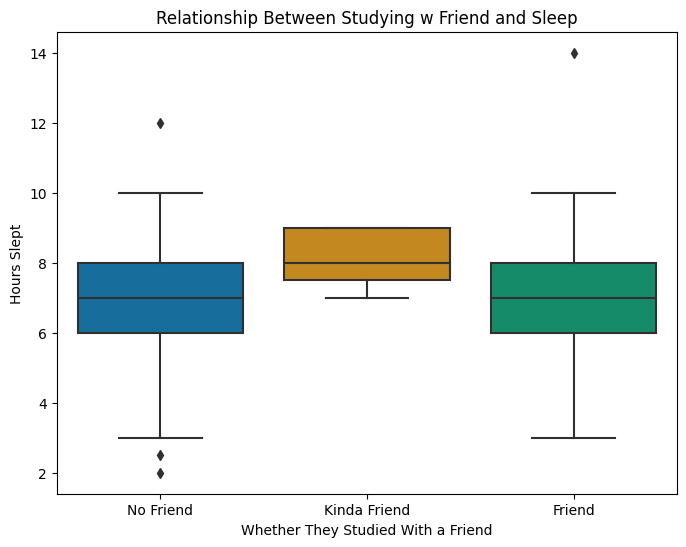

In [ ]:
# Comparing the distributions of how many hours a student slept and whether
# they studied with a friend.

have_friend = survey[survey['Friend'] == 'Yes']['Sleep']
kinda_friend = survey[survey['Friend'] == 'Kinda']['Sleep']
no_friend = survey[survey['Friend'] == 'No']['Sleep']
cols2 = pd.DataFrame({'No Friend': no_friend, 'Kinda Friend': kinda_friend, 'Friend': have_friend})

plt.figure(figsize=(8, 6))
sns.boxplot(data=cols2, palette='colorblind')
plt.title('Relationship Between Studying w Friend and Sleep')
plt.xlabel('Whether They Studied With a Friend')
plt.ylabel('Hours Slept')
plt.show()

Do a hypothesis test on something you think is interesting.

In [ ]:
# A hypothesis test to see if the distributions of student's sleep for
# those of whom studied with friends, kinda studied with friends, or didn't
# study with friends have a stastically significant difference in mean. I
# wonder if whether students study with friends affects the amount of sleep they
# get.

from scipy.stats import f_oneway

# ANOVA test
f_statistic, p_value = f_oneway(no_friend, kinda_friend, have_friend)
print(f"P-value: {p_value}")

# There appears to be no statistically significant correlation between whether
# a student studied with friends and how much sleep they got.

P-value: 0.02653595497284769


Write code that trains a regression algorithm over the data, predicting grade. You may not use the "mystery" column, but you may use all other columns. You must get an R^2 value > .09.

In [ ]:
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

categ_cols = ['Fair', 'Lectures', 'Assignments', 'XP', 'Class']
categ_data = survey[categ_cols]
encoded_data = pd.get_dummies(categ_data, columns=categ_cols)
all_fields = pd.concat([encoded_data, survey[['Hours_Studied', 'Sleep']]], axis=1)
target = survey['Grade']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(all_fields, target, test_size=0.2, random_state=0)
model = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"R-squared value:", sklearn.metrics.r2_score(y_test, predictions))

R-squared value: 0.12205794477051446


Is your model any good? What does its performance tell you about the input variables' relationship to your grade?

An R-squared value of 0.122 tells us that the model explains around 12.2% of the variance in the target variable, Grade. This is pretty low, so my model is not that great. The R-squared value tells us that perhaps the included features influence a student's grade, but other factors probably influence a student's grade far more. I've tried several other regression models but found better r-squared values with this one. Also, removing any of the features I included reduced my r-squared value, so I do think they impact a student's grade and should be included.

Execute the same code with the addition of the mystery column. You must get an R^2 higher than .7. Print your R^2 value.

In [ ]:
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics

categ_cols = ['Friend', 'Fair', 'Lectures', 'Assignments', 'XP', 'Class']
categ_data = survey[categ_cols]
encoded_data = pd.get_dummies(categ_data, columns=categ_cols)
all_fields = pd.concat([encoded_data, survey[['Hours_Studied', 'Sleep', 'Mystery']]], axis=1)
target = survey['Grade']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(all_fields, target, test_size=0.2, random_state=0)
model = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"R-squared value:", sklearn.metrics.r2_score(y_test, predictions))

R-squared value: 0.8515097575467153


What is the mystery column, and why did it boost your model's accuracy so much?

I think the mystery column is half of the student's score on the previous exam. This would explain why it does such a good job at estimating performance on the second exam. There would likely be some pattern between how students perform on one exam compared to the next.